In [77]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as plt

In [78]:
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/NASDAQ-100')[4]

In [79]:
tickers = ticker_df.Ticker.to_list()

In [80]:
df = yf.download(tickers, start='2010-01-01')['Adj Close']

[*********************100%***********************]  101 of 101 completed


In [81]:
df = df.dropna(axis=1)

In [82]:
df

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515212,37.090000,23.067617,27.491220,25.670000,21.142136,18.500000,11.328532,9.700000,43.267185,...,9.256215,10.540000,0.579823,22.440001,13.207044,18.767338,29.074844,44.240002,26.326166,15.840572
2010-01-05,6.526476,37.700001,23.031202,27.343594,25.280001,20.900101,18.010000,11.241387,9.710000,42.892384,...,9.473064,10.530000,0.615505,22.250000,13.240186,18.659105,29.269650,42.779999,26.114424,16.463976
2010-01-06,6.422663,37.619999,22.987497,27.279400,25.340000,21.111887,17.480000,11.217623,9.570000,42.570042,...,9.404798,10.820000,0.615505,22.209999,12.345354,18.522013,29.649523,42.029999,25.916807,16.709249
2010-01-07,6.410789,36.889999,22.805405,27.266560,25.480000,21.293413,17.430000,11.098788,9.470000,42.180248,...,9.380702,10.760000,0.597664,22.150000,12.461351,18.579735,29.600821,41.500000,26.072081,16.699030
2010-01-08,6.453412,36.689999,22.936510,27.228052,26.260000,21.547556,17.660000,11.526582,9.430000,42.555058,...,9.348576,10.820000,0.597664,22.309999,11.765371,19.005442,29.220947,40.669998,26.107374,16.750128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,143.210007,339.920013,171.679993,260.079987,200.059998,98.489998,195.809998,109.639999,68.930000,271.130005,...,102.190002,132.050003,6.120000,332.029999,142.360001,175.820007,182.970001,312.089996,40.630001,10.980000
2022-12-15,136.500000,328.709991,166.089996,248.789993,194.110001,95.570000,201.970001,104.559998,66.529999,266.140015,...,99.989998,128.410004,5.970000,323.820007,140.199997,170.009995,176.600006,308.399994,39.529999,10.000000
2022-12-16,134.509995,338.540009,166.820007,247.050003,192.399994,94.570000,198.210007,104.730003,65.410004,267.410004,...,98.830002,129.610001,5.960000,329.119995,142.360001,169.550003,175.020004,304.799988,39.049999,9.910000


In [83]:
mtl = (df.pct_change() + 1)[1:].resample('M').prod()

In [84]:
def get_rolling_def(df, n):
    return df.rolling(n).apply(np.prod)

In [85]:
ret_12, ret_6, ret_3 = get_rolling_def(mtl, 12), get_rolling_def(mtl, 6), get_rolling_def(mtl, 3)

In [86]:
ret_12

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.041303,0.562664,0.946937,1.191276,0.650585,1.157029,0.343724,0.702024,0.766528,1.100790,...,0.731511,0.920585,1.021775,1.041476,1.050650,0.888249,0.933506,1.406760,0.721295,0.459085
2022-09-30,0.982151,0.478010,0.847208,1.152495,0.655048,1.101425,0.311242,0.641824,0.615743,1.095075,...,0.780885,0.805830,0.984718,1.020373,1.050172,0.826544,0.857102,1.596229,0.696798,0.453113
2022-10-31,1.029367,0.489729,0.837111,1.096734,0.674727,1.073475,0.311194,0.651560,0.499543,1.349504,...,0.834556,0.721148,1.043339,0.878054,1.317569,0.881011,0.875221,1.687125,0.810489,0.554607


In [87]:
ret_6

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.954879,0.798495,0.954321,1.207175,0.916042,1.122822,0.476479,0.704480,0.688098,1.077805,...,0.927601,1.197253,0.995399,1.107654,1.168412,0.984934,1.059205,1.224937,0.778768,0.472014
2022-09-30,0.793742,0.604012,0.851571,1.003105,0.871472,0.880189,0.475023,0.624737,0.579477,0.946843,...,0.938078,0.949879,0.868437,0.916704,1.045345,0.854910,0.797384,1.109476,0.718034,0.461477
2022-10-31,0.975443,0.804394,0.932592,1.117873,1.132185,0.901117,0.670208,0.804098,0.702292,1.177695,...,1.174929,0.970613,1.013552,1.020084,1.230794,0.963791,0.899224,1.141937,0.881312,0.716253


In [88]:
ret_3

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SBUX,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,1.098080,0.953626,0.916196,1.046438,1.144527,0.990319,1.045405,0.946501,0.955670,1.036729,...,1.052928,1.132827,1.338462,0.996881,0.888331,0.945614,0.944724,0.923825,0.998485,1.090000
2010-04-30,1.359419,1.040248,1.117711,1.071594,1.428752,1.002113,0.906667,1.136820,1.215818,0.979993,...,1.197229,1.220930,1.404762,1.065350,1.355240,1.161250,0.996444,1.009635,0.979069,1.305799
2010-05-31,1.255400,0.925830,1.012155,0.990165,1.049498,0.962742,0.824309,1.061397,1.083439,0.914680,...,1.134756,1.297059,1.009804,0.978082,1.457050,1.006191,1.068905,0.853231,0.912721,1.208989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.057769,0.896658,0.904153,1.101511,0.971071,0.989778,0.877755,0.804080,0.833202,0.943195,...,1.077057,1.137161,0.954688,1.084022,1.080051,0.940813,1.072030,1.048800,0.809415,0.717615
2022-09-30,1.012229,0.751789,0.958386,1.081544,1.086299,0.908162,0.875100,0.902831,0.828560,0.933583,...,1.109309,0.773313,0.934544,1.005960,0.997250,1.013989,0.986853,1.027503,0.838342,0.856930
2022-10-31,0.944883,0.776602,0.833371,1.006737,0.990662,0.899052,0.691533,0.835212,0.635757,1.100892,...,1.027169,0.706523,0.907161,0.796054,1.059416,0.905086,0.962601,1.112656,0.932200,0.866667


In [89]:
top_50 = ret_12.loc['2010-12-31'].nlargest(50).index

In [90]:
top_30 = ret_6.loc['2010-12-31', top_50].nlargest(30).index

top_30

Index(['BKNG', 'FTNT', 'LULU', 'SIRI', 'NFLX', 'ADSK', 'TMUS', 'CSGP', 'REGN',
       'CTSH', 'ILMN', 'PCAR', 'CDNS', 'EBAY', 'INTU', 'BIIB', 'TXN', 'ASML',
       'MAR', 'HON', 'ADI', 'ODFL', 'LRCX', 'AVGO', 'DLTR', 'MNST', 'SBUX',
       'COST', 'CSX', 'SNPS'],
      dtype='object')

In [91]:
top_10 = ret_3.loc['2010-12-31', top_30].nlargest(10).index
top_10

Index(['LULU', 'SIRI', 'FTNT', 'ASML', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
       'HON'],
      dtype='object')

In [92]:
def get_top(date):
    top_50 = ret_12.loc[date].nlargest(50).index
    top_30 = ret_6.loc[date, top_50].nlargest(30).index
    top_10 = ret_3.loc[date, top_30].nlargest(10).index
    return top_10

In [93]:
get_top('2022-10-31')

Index(['GILD', 'BIIB', 'REGN', 'ORLY', 'ROST', 'CSGP', 'VRTX', 'AMGN', 'HON',
       'PCAR'],
      dtype='object')

In [94]:
portfolio = mtl.loc['2022-10-31':, get_top('2022-10-31')][1:2]
portfolio

,GILD,BIIB,REGN,ORLY,ROST,CSGP,VRTX,AMGN,HON,PCAR
Date,,,,,,,,,,
2022-11-30,1.119424,1.076665,1.00394,1.032693,1.2297,0.979691,1.014103,1.066664,1.08139,1.097731


In [95]:
portfolio.mean(axis=1).values[0]

1.0702000164797023

In [96]:
def pf_performance(date):
    portfolio = mtl.loc[date:, get_top(date)][1:2]
    return portfolio.mean(axis=1).values[0]

In [97]:
pf_performance('2022-10-31')

1.0702000164797023

In [98]:
mtl.index[:-1]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=155, freq='M')

In [104]:
returns = []

for date in mtl.index[:-1]:
    returns.append(pf_performance(date))

<AxesSubplot: xlabel='Date'>

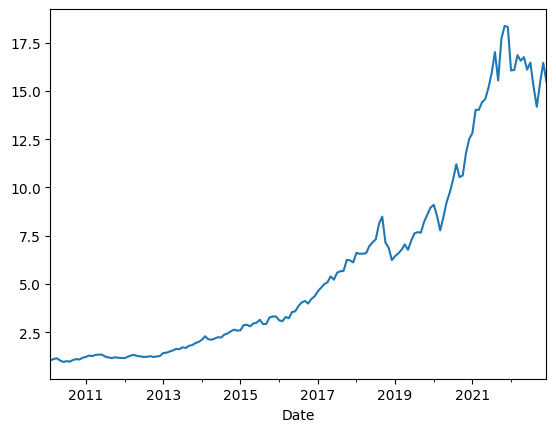

In [107]:
pd.Series([i - 0.002 for i in returns], index=mtl.index[1:]).cumprod().plot()

In [101]:
nasdaq_df = yf.download('^IXIC', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

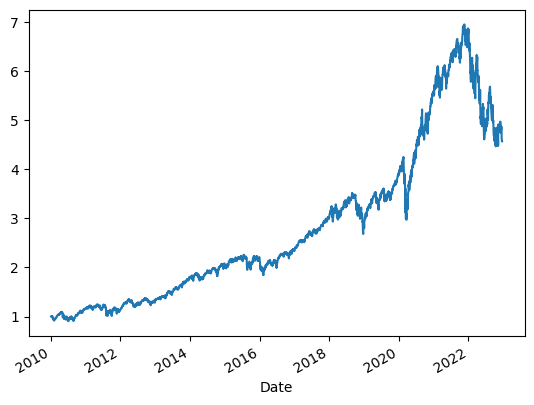

In [102]:
(nasdaq_df['Adj Close'].pct_change() + 1).cumprod().plot()